In [17]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as ag
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

In [27]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
df['species']=iris.target
x=iris.data
y=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
names=iris.target_names
print(names[0])
print(names[1])
print(names[2])

setosa
versicolor
virginica


In [30]:
df.drop('species',axis=1,inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


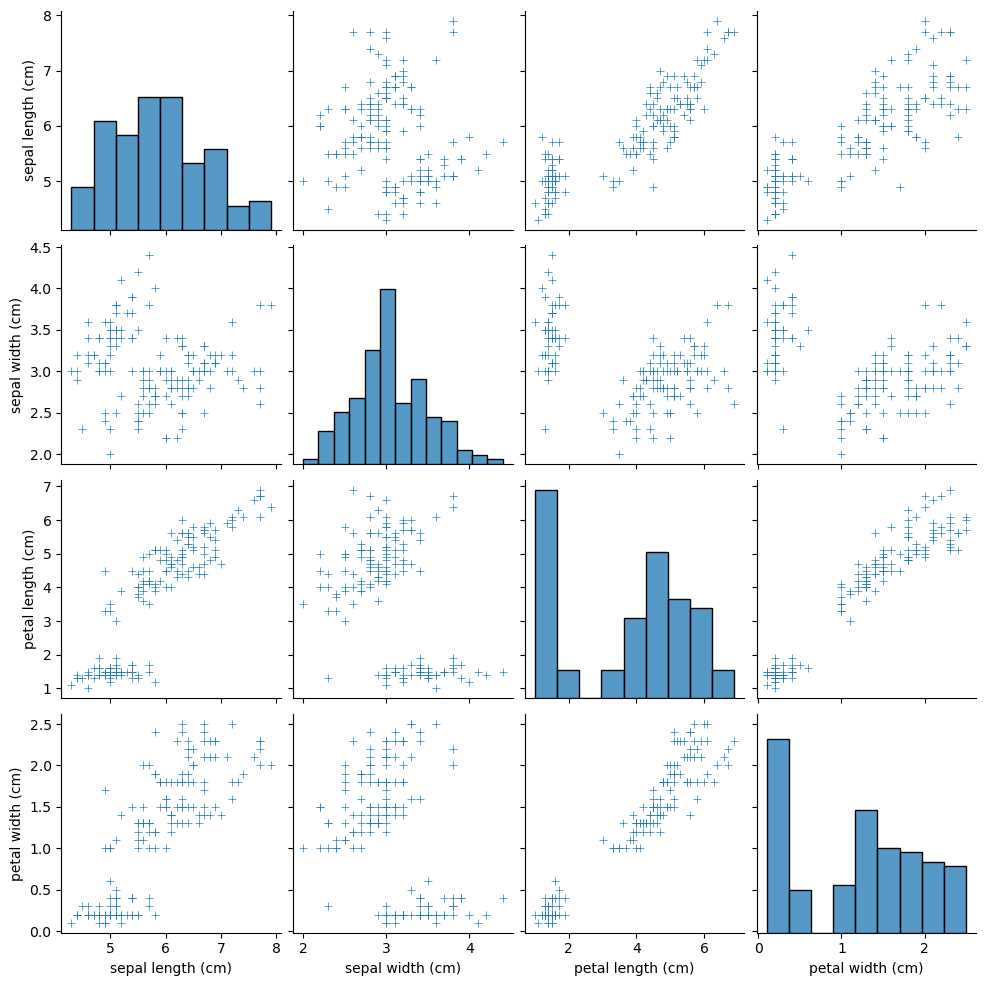

In [33]:
sns.pairplot(df,markers='+')

<Axes: >

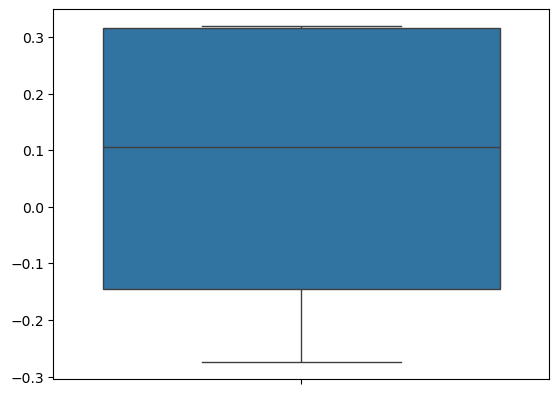

In [34]:
out=df.skew()
sns.boxplot(out)

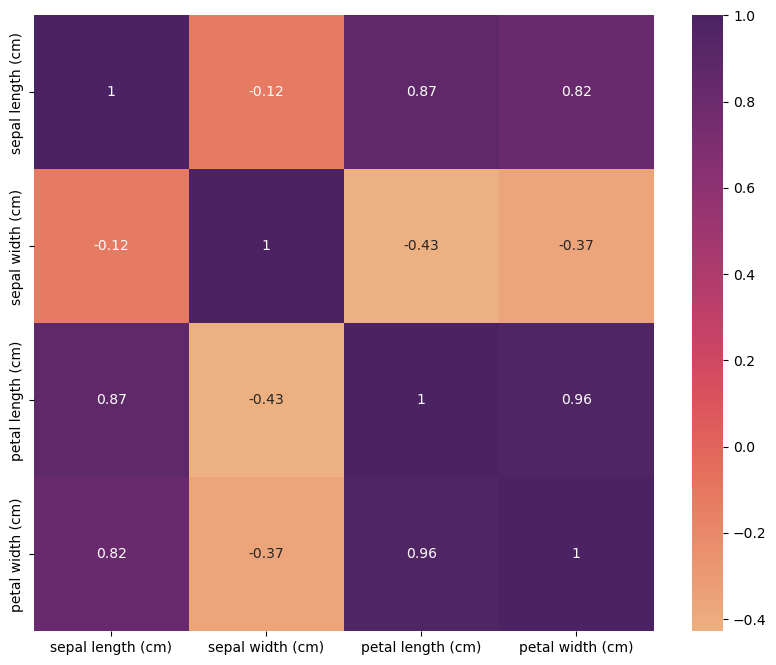

In [35]:
correl=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correl,annot=True,cmap='flare')
correl
plt.show()

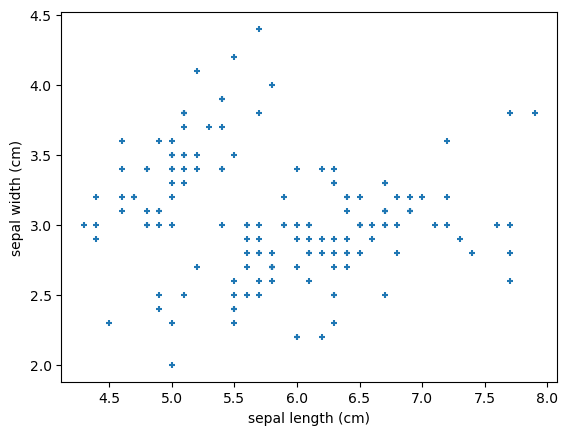

In [36]:
df.plot(kind='scatter',x="sepal length (cm)",y="sepal width (cm)",marker='+')
plt.show()

## Applying elbow method: 
**-> implemented to help determine the optimal number of clusters for the K-Means algorithm.**

Text(0, 0.5, 'Squared Distance')

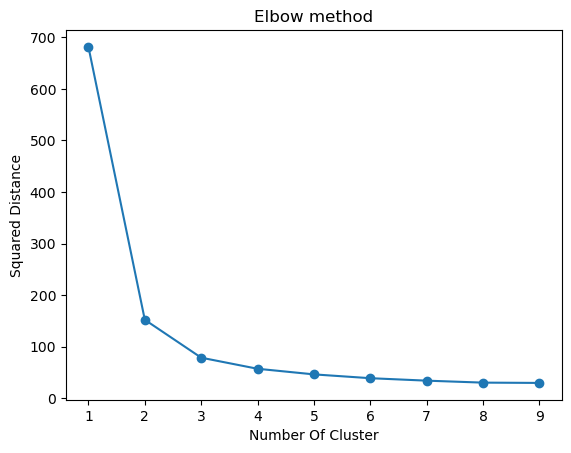

In [37]:
wss=[]
for i in range (1,10):
    kmean=KMeans(n_clusters=i,random_state=42)
    kmean.fit(df)
    wss.append(kmean.inertia_)
plt.plot(range(1,10),wss,marker='o')
plt.title("Elbow method")
plt.xlabel('Number Of Cluster')
plt.ylabel("Squared Distance")

## Applying Silhoette Score
**-> evaluate the performance of the K-Means clustering algorithm for different numbers of clusters.**    
    

 Silhouette Score:

The **Silhouette Score** evaluates both cohesion and separation:
- **Cohesion**: Measures how close the data points in a cluster are to one another.
- **Separation**: Measures how far away the clusters are from each other.

By testing different values of `i` (number of clusters), you can use the Silhouette Score to assess which numberoptf clusters provides the beimal clustering structure for your data.
    

In [38]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(df)
    score=silhouette_score(df,kmeans.labels_)
    print("the iter number {} has score{}".format(i,score))


the iter number 2 has score0.6810461692117462
the iter number 3 has score0.5528190123564095
the iter number 4 has score0.4965168654914939
the iter number 5 has score0.48997211669094703
the iter number 6 has score0.48109131405843697
the iter number 7 has score0.4749382273806967
the iter number 8 has score0.3617900335973811
the iter number 9 has score0.31405901386059476


## Implementing Kmeans & Hierarchical Clustering(Agglomerative Clustering)

In [39]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

**KMeans Clustering** is an unsupervised machine learning algorithm that groups data points into K clusters based on their feature similarities. The goal is to partition the dataset such that each data point belongs to the cluster with the nearest mean (centroid). 

**Steps of KMeans Clustering Algorithm**

**1. Specify the Number of Clusters (K)**: You decide how many clusters (K) to form based on the data.

**2. Initialize Centroids**: K points are randomly selected from the data as initial centroids (cluster centers).

**3. Assign Data Points**: Each data point is assigned to the nearest centroid, forming K clusters.

**4. Update Centroids**: The centroids are recalculated as the mean of all points in a cluster.

**Repeat**: Steps 3 and 4 are repeated until the centroids stop moving or reach a maximum number of iterations.



In the code:

- **`fit_transform()`** computes the mean and standard deviation for each feature in `x` and then transforms the data by scaling each feature to have a mean of 0 and standard deviation of 1.
- This ensures that the clustering process treats each feature equally, rather than being biased toward features with larger numerical values.

In short, standardization improves the clustering quality by ensuring that all features contribute equally to the distance calculations in algorithms like K-Means.

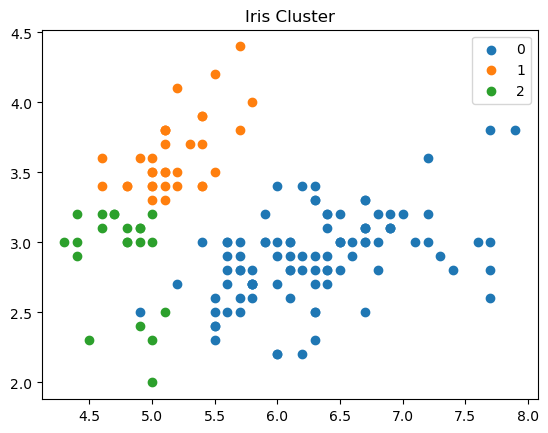

In [41]:
kmeans=KMeans(n_clusters=3,random_state=42)
y= kmeans.fit_predict(x_scaled)
unique_label=np.unique(y)
for i in unique_label:
    plt.scatter(x[y==i,0],x[y==i,1],label=i)
plt.legend()
plt.title("Iris Cluster")
plt.show()

Standardization (or scaling) is done to ensure that all features in the dataset have the same scale, typically with a mean of 0 and a standard deviation of 1. This is important for clustering algorithms like K-Means 

### Code Breakdown:

1. **K-Means Clustering**:
   - **`KMeans(n_clusters=3)`**: This initializes the K-Means algorithm with 3 clusters. Since the Iris dataset contains three species (Setosa, Versicolor, and Virginica), it's reasonable to use 3 clusters (`n_clusters=3`).
   - **`random_state=42`**: Ensures that the clustering results are reproducible (i.e., the same random seed will generate the same results every time).
   - **`fit_predict(x_scaled)`**: This method does two things:
     1. **Fits the K-Means model** to the standardized data (`x_scaled`).
     2. **Predicts the cluster labels** for each data point. The result (`y`) is an array where each value indicates the cluster (0, 1, or 2) that a data point has been assigned to.

2. **Extracting Unique Cluster Labels**:

   - **`np.unique(y)`**: This function returns the unique cluster labels present in `y`, which in this case will be `[0, 1, 2]`, corresponding to the 3 clusters.

3. **Plotting Clusters**:
   ```python
   for i in unique_label:
       plt.scatter(x[y == i, 0], x[y == i, 1], label=i)
   ```
   - This loop iterates through each cluster label (`i`), plotting the data points that belong to that specific cluster:
     - **`x[y == i, 0]`** selects the data points belonging to cluster `i` and uses their first feature (first column) for the x-axis.
     - **`x[y == i, 1]`** selects the same data points and uses their second feature (second column) for the y-axis.
   - **`plt.scatter()`**: Plots the selected points on a 2D scatter plot. Each cluster is plotted with a different color, and the `label=i` associates the cluster number with the data points for that cluster.
   
4. **Legend and Title**:

   - **`plt.legend()`**: Adds a legend to the plot, showing the cluster labels (0, 1, 2) with corresponding colors.
   - **`plt.title("Iris Cluster")`**: Adds a title to the plot.

5. **Display Plot**:
   plt.show()- This command displays the scatter plot, visualizing the clusters formed by the K-Means algorithm.

- The plot will have three distinct clusters of data points. Each cluster represents one of the groups (species) identified by the K-Means algorithm. However, keep in mind:
  - **Only two features** of the dataset (the first two columns) are being used for this 2D scatter plot.
  - In reality, the Iris dataset has four features, but we’re visualizing only two for simplicity and illustration purposes. 
  - The clusters are labeled as `0`, `1`, and `2`, which may not directly correspond to the original species labels (Setosa, Versicolor, Virginica). However, you can manually match them based on the cluster centroids or the distribution of data points.

**Why KMeans for Iris Dataset?**

**Simple and Efficient**: KMeans is easy to implement and works efficiently with smaller datasets like Iris.

**Suitable for Numeric Data**: The Iris dataset contains continuous numerical features (sepal length, petal length, etc.), making it a good candidate for KMeans, which is based on calculating distances.

**Natural Grouping**: Since the Iris dataset naturally divides into three species, KMeans can easily identify this structure when provided with the correct number of clusters (K=3).

## Hierarchial clustering 

**Hierarchical Clustering: How It Works**
Hierarchical Clustering is an unsupervised machine learning algorithm that builds a hierarchy of clusters by either:
**Agglomerative Clustering (bottom-up approach)**: Each data point starts as its own cluster, and pairs of clusters are merged iteratively based on their similarity (distance).

**Divisive Clustering (top-down approach)**: All points start in one cluster, and the clusters are split iteratively.

**Agglomerative Clustering is more commonly used** and works as follows:

**Steps of Agglomerative Hierarchical Clustering:**

**Assign each data point to its own cluster**: Initially, every point is its own cluster.

**Compute distances between clusters**: Distances between clusters are calculated using different linkage methods:

**Single linkage**: Minimum distance between points from two clusters.

**Complete linkage**: Maximum distance between points from two clusters.

**Average linkage**: Average distance between all points from two clusters.

**Ward's method**: Minimizes the variance between clusters.

**Merge the closest clusters**: The two clusters with the smallest distance are merged.

**Repeat**: This process of merging clusters is repeated until all points are in a single cluster.

**Dendrogram**: The results are often visualized in a dendrogram, which shows the hierarchy of clusters and how they are merged step by step.

**Why Hierarchical Clustering is Suitable for the Iris Dataset?**

**Small Dataset:** The Iris dataset contains only 150 samples and 4 features, making it computationally feasible for hierarchical clustering. Since hierarchical clustering has a higher computational complexity than KMeans, it works best with smaller datasets.

**No Predefined Number of Clusters**: Unlike KMeans, hierarchical clustering does not require the number of clusters (K) to be predefined. The dendrogram helps visualize the natural groupings in the data, and the optimal number of clusters can be determined by cutting the dendrogram at a certain level.

**Visual Exploration**: The dendrogram generated by hierarchical clustering provides insights into the structure of the data, allowing us to see how points are grouped at different levels. This is especially helpful in understanding whether the dataset forms distinct clusters or exhibits a more continuous structure.

**Natural Grouping**: Since the Iris dataset has distinct species with clear separations, hierarchical clustering can reveal this natural grouping and provide a detailed understanding of the relationships between points.


In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage

imports two important functions, **`dendrogram`** and **`linkage`**, from the **`scipy.cluster.hierarchy`** module. These functions are used for **Hierarchical Clustering**. 

### 1. **`linkage` Function**:
   - The **`linkage`** function is used to perform hierarchical/agglomerative clustering.
   - It calculates the pairwise distances between observations and builds a hierarchical cluster tree.
   - The output is a matrix (called a linkage matrix), which encodes the hierarchical clustering structure. It contains information about which clusters were merged at each step and the distance between the clusters.

   **Parameters**:
   - `X`: The dataset, which is typically a 2D array with rows as observations and columns as features.
   - `method`: The linkage algorithm to use (e.g., 'single', 'complete', 'average', 'ward'). These specify how to calculate the distance between clusters.
   
   **Example**:
   ```python
   Z = linkage(X, method='ward')
   ```
   - This calculates the linkage matrix `Z` using Ward’s method (minimizing the variance of the clusters being merged).

### 2. **`dendrogram` Function**:
   - The **`dendrogram`** function is used to plot the hierarchical clustering as a tree-like diagram (called a dendrogram).
   - The dendrogram shows the order in which clusters were merged and at what distance they were joined. It provides a visual representation of the clustering hierarchy.

   **Parameters**:
   - `Z`: The linkage matrix returned by the `linkage` function.
   - `truncate_mode`, `p`: Additional arguments to control the depth and appearance of the dendrogram.
   
   **Example**:
   ```python
   dendrogram(Z)
   plt.show()
   ```
   - This plots the dendrogram from the linkage matrix `Z`.


### Explanation:
1. **`linkage(X_scaled, method='ward')`**: This performs hierarchical clustering on the standardized data (`X_scaled`), using Ward’s method. The result is stored in `Z`, the linkage matrix.
2. **`dendrogram(Z)`**: This plots the dendrogram based on the hierarchical clustering represented by `Z`.
3. The plot will show how the data points (samples) are grouped into clusters at each level of the hierarchy, and the height of the vertical lines represents the distance at which clusters are merged.

This combination of `linkage` and `dendrogram` is essential for visualizing hierarchical clustering.

In [43]:
#seperate features and class labels
x_features=iris.data
y_label=iris.target


## Model Implementation of Hierarchial clustering 

In [45]:
model=ag(linkage='ward',n_clusters=3)
model.fit(x_features)
predicted=model.labels_
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

- **`predicted`** represents the output of the hierarchical clustering algorithm, where each value in the array corresponds to the cluster index assigned to each data point.
- This can be used to evaluate the performance of clustering or to visualize the clusters using a scatter plot.

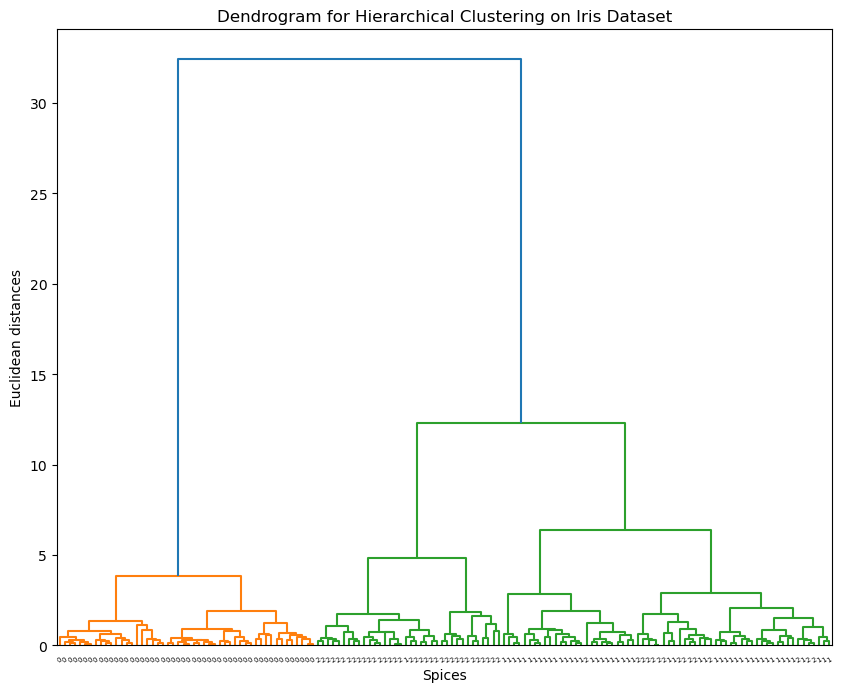

In [46]:
linkage_matrix=linkage(x_features,method='ward')
plt.figure(figsize=(10,8))
dendrogram(linkage_matrix,labels=y_label,leaf_rotation=30)
plt.title("Dendrogram for Hierarchical Clustering on Iris Dataset")
plt.xlabel("Spices")
plt.ylabel('Euclidean distances')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

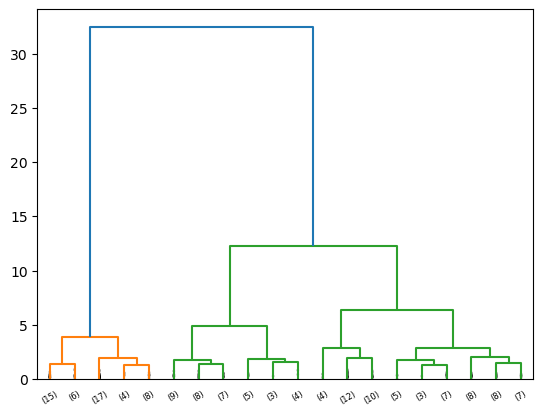

In [47]:
dendrogram(linkage_matrix,truncate_mode='lastp',p=20,leaf_rotation=30,show_contracted=True,leaf_font_size=6)
plt.show

## Cutting the dendogram to form Cluster

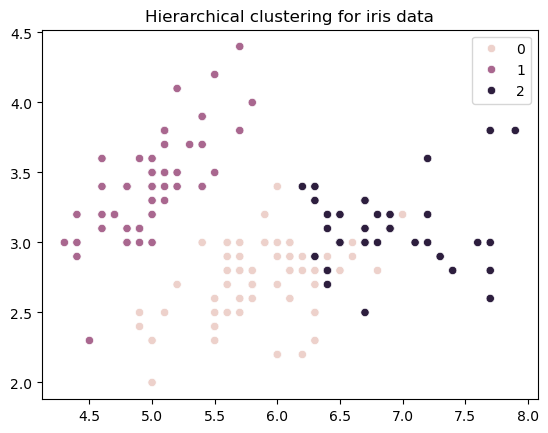

In [48]:
num_cluster=3
hierarchical_model=ag(n_clusters=3)
labels=hierarchical_model.fit_predict(x_features)

sns.scatterplot(x=x_features[:,0],y=x_features[:,1],hue=labels,markers=['s,o,-'])
plt.title('Hierarchical clustering for iris data')
plt.show()

**KMeans Clustering** partitions the data into 3 clusters based on centroids. It's suitable because of the numerical nature of the Iris dataset and its efficiency.

**Hierarchical Clustering** provides insight into the structure of the data using a dendrogram. It is suitable due to the small size and clear separability of the Iris dataset.